# Цели

* Применить фреймворк ICE для приоритизации гипотез. Отсортировать по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Сделать выводы
* Проанализировать A/B-тест
* Построить график кумулятивной выручки по группам
* Построить график кумулятивного среднего чека по группам
* Построить график относительного изменения кумулятивного среднего чека группы B к группе A
* Построить график кумулятивного среднего количества заказов на посетителя по группам
* Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
* Построить точечный график количества заказов по пользователям.
* Посчитать 95-й и 99-й перцентили количества заказов на пользователя.
* Построить точечный график стоимостей заказов. 
* Посчитать 95-й и 99-й перцентили стоимости заказов. 
* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
* Сделать выводы
* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным и сравнить её с неочищенными данными
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным и сравнить её с неочищенными данными
* Сделать выводы из сравнений. 
* Принять решение по результатам теста 
* Подвести итоги

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

## часть. Приоритезация гипотез. 

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 100 
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
data.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

### ICE для приоритизации гипотез

In [4]:
data['ICE'] = (data['impact']* data['confidence'])/data['efforts']
data = data.round({'ICE': 2}) 
data.sort_values('ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


При оценке ICE приоритет получают те гипотезы, которые оказывают наибольшее влияние на пользователей, а потом уже уверенность в том, что повляет именно таким образом. А потом уже затраты на реализацию этой гипотезы. Так как у акции чуть меньшие затраты, она получила приоритет над каналами трафика.  

### RICE для приоритизации гипотез

In [5]:
data['RICE'] = (data['impact']* data['confidence']*data['reach'] )/data['efforts']
data.sort_values('RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


При оценке RICE приоритет получают те гипотезы, которые затрагивают наибольшее число пользователей. Влияние и затраты тут уходят на второй план. Таким образом, так как форма подписки повлияет на всех пользователей, то эта гипотеза вырвалась в лидеры, в ICE она была только на третьем месте из-за не такого сильного влияния на пользователей. Второе место получила гипотеза с очень низким влиянием, но зато и низкими затратами и затрагивающая большиство пользователей. 

###  Совместная таблица ICE  и RICE и выводы.

In [6]:
data[[ 'hypothesis', 'RICE', 'ICE']].sort_values(['RICE','ICE'], ascending=[False, False])

,hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.20
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0,7.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0,8.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.12
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.33
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.00


При оценки гипотех нужно понимать приоритеты. Либо охватить всех пользователей новым функционалом или предложением или угодить более узкой прослойке. Исходя из этих задач и стоит выбирать между ICE  и RICE. 

## часть. Подготовка данных к анализу A/B тестирования

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [8]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [9]:
orders.dtypes # проверяем формат представленных данных.


transactionId     int64
visitorId         int64
date             object
revenue           int64
group            object
dtype: object

Для точности теста убедимся нет ли пользователей, которые попали в обе группы.

In [10]:
duplicatedUsers = np.intersect1d(orders.query('group=="A"')['visitorId'].unique(), orders.query('group=="B"')['visitorId'].unique())

Удаляем таких пользоватлей

In [11]:
orders = orders[~orders.visitorId.isin(duplicatedUsers)]
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [12]:
visitors.dtypes

date        object
group       object
visitors     int64
dtype: object

Изменяем формат данных на тип даты, чтобы строить графики.

In [13]:
pd.options.mode.chained_assignment = None
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [14]:
datesGroups = orders[['date', 'group']].drop_duplicates()


In [15]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])


In [16]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


Объединяем данные о визитах и покупках в общую таблицу на основе группы и даты.

In [17]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


In [18]:
cumulativeData['group'].unique()

array(['A', 'B'], dtype=object)

In [19]:
cumulativeData.groupby('group').agg({
                'date': ['first', 'last'],
                'buyers':'sum'})

date            buyers
           first       last    sum
group                             
A     2019-08-01 2019-08-31   7469
B     2019-08-01 2019-08-31   8782

У нас всего две группы. Тест начался и закончился одновременно для обеих групп. В первую группу попало меньше покупателей

Считаем конверсию

In [20]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)
cumulativeData['conversion']

0     0.031989
1     0.023843
2     0.031390
3     0.030912
4     0.035772
        ...   
57    0.028801
58    0.025503
59    0.029179
60    0.024979
61    0.028970
Name: conversion, Length: 62, dtype: float64

### график кумулятивной выручки по группам

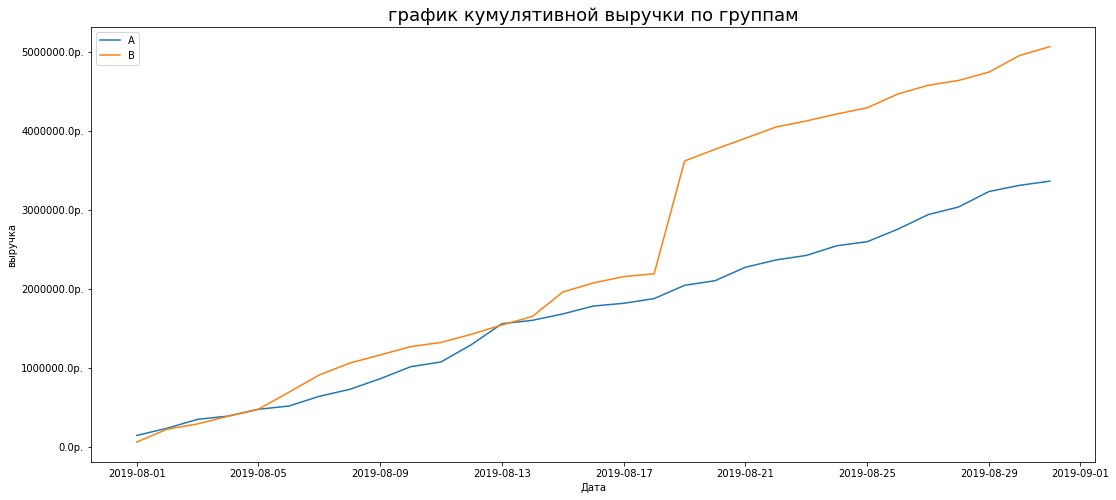

In [21]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']]
fig = plt.figure(figsize=(18, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')



plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Дата')
plt.ylabel('выручка')
plt.title("график кумулятивной выручки по группам",fontsize=18)


ax = plt.gca()

ax.yaxis.set_major_formatter('{x}р.')

plt.legend()

plt.show()

Исходя из этого графика можно сделать вывод, что в начале выручка в группе B и A были почти равны, а потом группа B начала значительно опережать группу A. Так же можно отметить что выручка растет в обеих группах, но во второй группе она растет больше. На это могли повляить очень круппные по сумме заказы в одной из групп.

### график кумулятивного среднего чека по группам

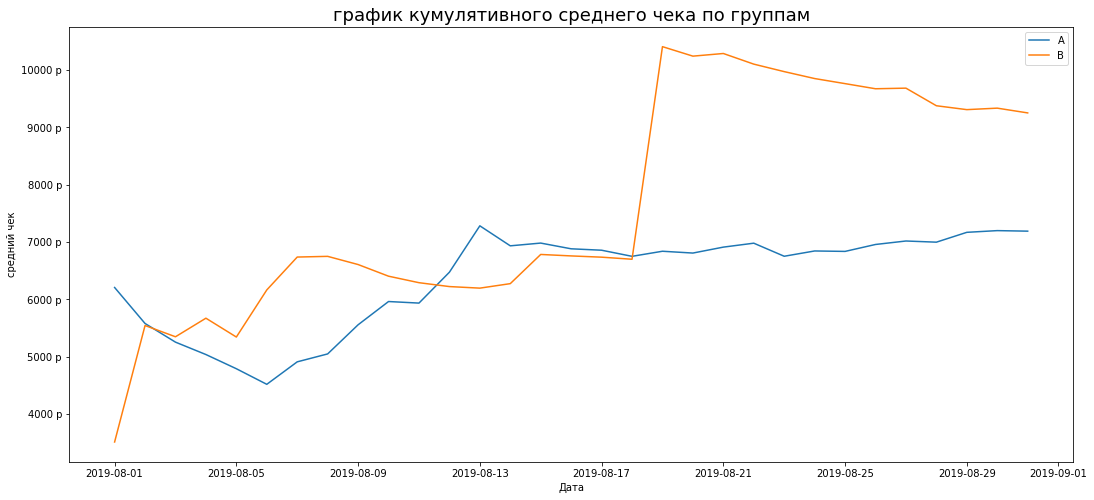

In [22]:

fig = plt.figure(figsize=(18, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('средний чек')
plt.title("график кумулятивного среднего чека по группам",fontsize=18)


ax = plt.gca()

ax.yaxis.set_major_formatter(FormatStrFormatter('%d р'))

plt.legend()
plt.show()


Средний чек неравномерный для обеих групп. Есть как рост так и падение для них. Где-то до середины наблюдений нельзя выявить однозначного лидера, но потом вторая группа явно вырывается в лидеры. Возможно, на группу b повлияли слишком крупные заказы, сделанные в один момент. 

### график относительного изменения кумулятивного среднего чека группы B к группе A

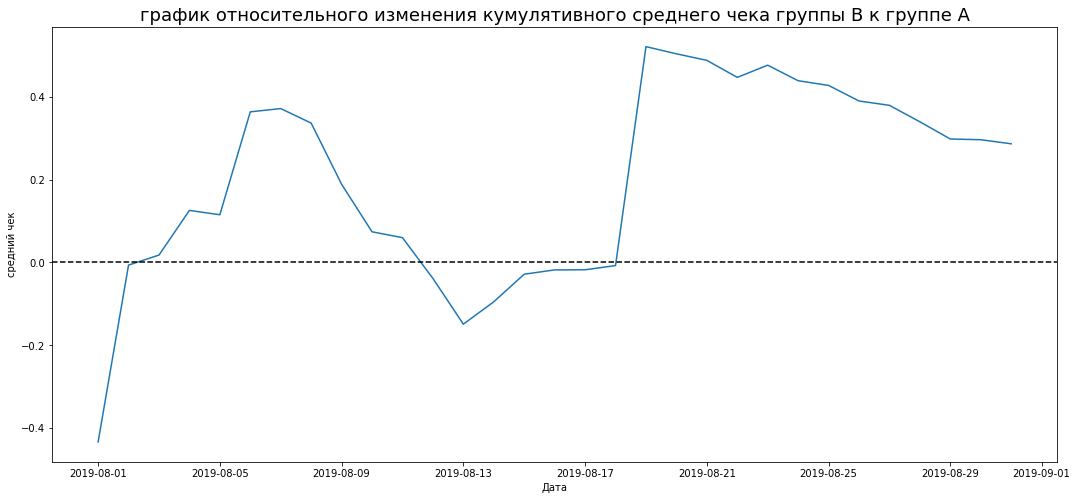

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
fig = plt.figure(figsize=(18, 8))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('средний чек')
plt.title("график относительного изменения кумулятивного среднего чека группы B к группе A",fontsize=18)





plt.show()

График сильно скачет. Скорее всего, на него влияют вбросы. 

### график кумулятивного среднего количества заказов на посетителя по группам

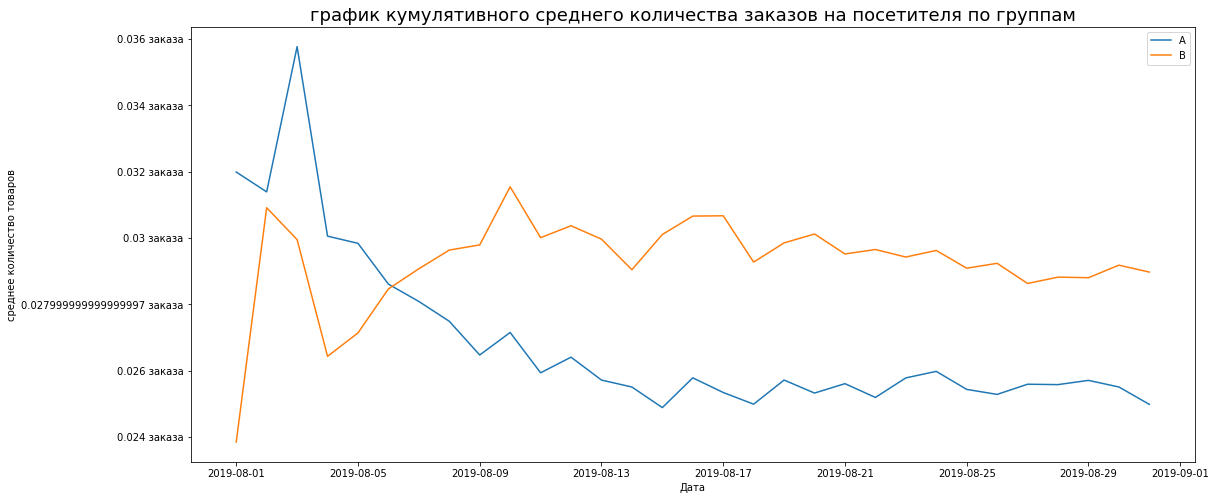

In [24]:
cumulativeConversionA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'conversion']
]
cumulativeConversionB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'conversion']
]
fig = plt.figure(figsize=(18, 8))
plt.plot(cumulativeConversionA['date'], cumulativeConversionA['conversion'], label='A')
plt.plot(cumulativeConversionB['date'], cumulativeConversionB['conversion'], label='B')

plt.xlabel('Дата')
plt.ylabel('среднее количество товаров')
plt.title("график кумулятивного среднего количества заказов на посетителя по группам",fontsize=18)



ax = plt.gca()

ax.yaxis.set_major_formatter('{x} заказа')


plt.legend()

plt.show()

График тоже сильно меняется. Но количество заказов в группе B выросло и осталось приблизительно на олном уровне, а количество заказов  из группы A упало и постепенно стала снижаться

### график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

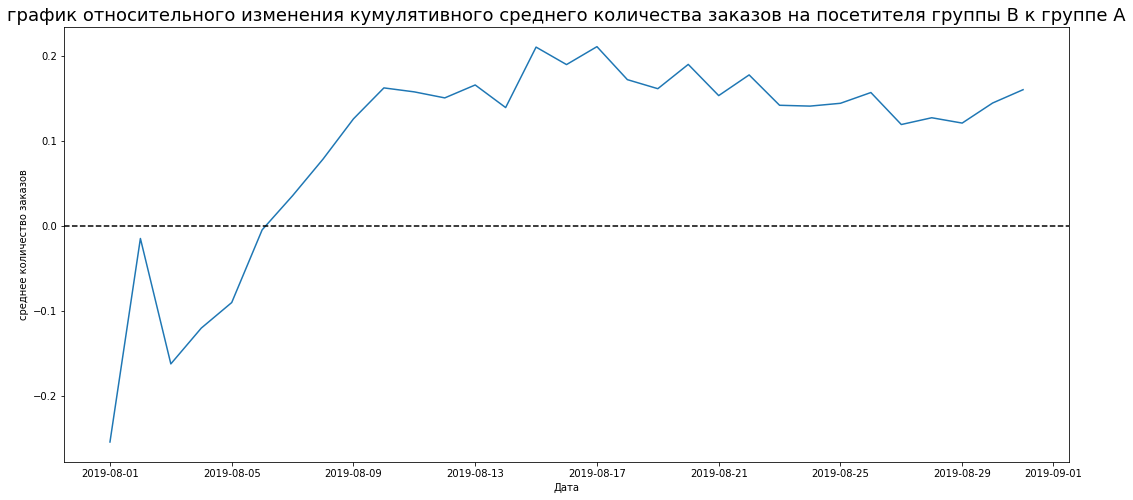

In [25]:
mergedСumulativeConversion = cumulativeConversionA.merge(cumulativeConversionB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig = plt.figure(figsize=(18, 8))
# cтроим отношение средних чеков
plt.plot(mergedСumulativeConversion['date'], mergedСumulativeConversion['conversionB']/mergedСumulativeConversion['conversionA']-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('среднее количество заказов')
plt.title("график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A",fontsize=18)





plt.show()

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперед. После этого только укрепила лидерство вплоть до самого конца теста. Конверсия продолжает колебаться, а значит еще не установилась.

In [26]:

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
...,...,...
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1


### точечный график количества заказов

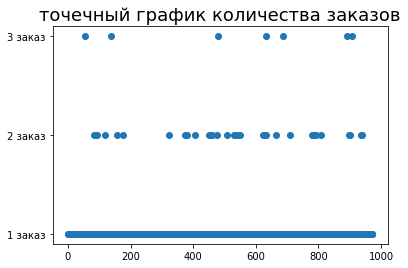

In [27]:
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))

plt.title("точечный график количества заказов",fontsize=18)





plt.scatter(x_values, ordersByUsers['orders'])
ax = plt.gca()
ax.set_yticks(range(1,4))

ax.yaxis.set_major_formatter('{x} заказ')

plt.show()

Большинство заказов приходится на 1 заказ. Не так много приходится на два заказа, и совсем немного на три. 

### перцентили по количествам заказов

In [28]:
ordersPerc = np.percentile(ordersByUsers['orders'], [95, 99])

print(f"95-й  перцентиль количества заказов на пользователя равен {ordersPerc[0]:.0f}, 99-й равен {ordersPerc[1]:.0f}")

95-й  перцентиль количества заказов на пользователя равен 1, 99-й равен 2


не более 5% заказали более одного товара, не более 1% более двух.

### точечный график стоимостей заказов

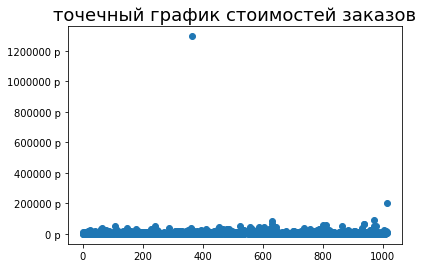

In [29]:

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.title("точечный график стоимостей заказов",fontsize=18)

plt.scatter(x_values, orders['revenue']) 
ax = plt.gca()

ax.yaxis.set_major_formatter(FormatStrFormatter('%d р'))

plt.show()

Большая часть заказов лежит где-то в районе до 20000, и только несколько штук превышают эту сумму. 

In [30]:
revPerc = np.percentile(orders['revenue'], [95, 99])

print(f"95-й  перцентиль стоимости заказов равен {revPerc[0]:.0f}р., 99-й = {revPerc[1]:.0f}р.")

95-й  перцентиль стоимости заказов равен 26785р., 99-й = 53904р.


не более 5% заказали товарова на сумму 26785р. и более, не более 1% заказали товаров на сумму более 53904р.

In [31]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


In [33]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


In [34]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [35]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


### статистическая значимость различия среднего количества

 
**Нулевая гипотеза:** нет статистически значимых различий в среднем числе заказов между группами 

**Альтернативная:** есть статистически значимые различия между числом заказов. 

In [36]:
print("статистическая значимость различия среднего количества заказов{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("относительное различие в среднем между группами {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

статистическая значимость различия среднего количества заказов0.01102
относительное различие в среднем между группами 0.160


Первое число меньше 0.05 значит нулевую гипотезу отвергаем. Однако среднее количество заказов увеличилось на 16 %. 

### статистическая значимость различий в среднем чеке 

**Нулевая гипотеза:** нет статистически значимых различий в среднем числе заказов между группами 

**Альтернативная:** есть статистически значимые различия между числом заказов. 

In [37]:
print('статистическая значимость различий в среднем чеке {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительные различия в среднем чеке между группами:{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

статистическая значимость различий в среднем чеке 0.829
относительные различия в среднем чеке между группами:0.287


Первое число больше 0.05 значит нулевую гипотезу не отвергаем.
Относительное различие между средними чеками целых 28 % 

**Промежуточный вывод**. Исходя из неочищенных данных можно сделать вывод, что вторая группа по параметрам среднего чека и количества заказов значительно лучше, чем первая. Есть вероятность что на средний чек повлияли вбросы, из-за этого на графике виден резкий рост. 

## часть. Выявление и очистка нетипичных пользователей

In [47]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > ordersPerc[0]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > ordersPerc[0]]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revPerc[0]+3215 ]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print( len(abnormalUsers))

77


Их не так много, но они могли серьезно повлиять на результаты выборки

**Нулевая гипотеза:** нет статистически значимых различий в среднем числе заказов между группами 

**Альтернативная:** есть статистически значимые различия между числом заказов. 

In [48]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.2f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01255
0.18


Первое число всё так же меньше 0.05 значит нулевую гипотезу отвергаем. Однако теперь разница не  16 %, а 18%.

**Нулевая гипотеза:** нет статистически значимых различий в среднем числе заказов между группами 

**Альтернативная:** есть статистически значимые различия между числом заказов. 

In [49]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)


0.829
-0.011


Первое по прежнему больше 0.05 значит нулевую гипотезу не отвергаем.
Однако теперь, избавившись от вбросов, средний чек во второй группе упал ниже первой группы. Это соответсует тому, что мы видели на графиках. Там был слишком явные и резкий рост. 

Имеющиеся факты:
* Статистически значимая разница по среднему количеству заказов между группами есть и  по «сырым», по данным после фильтрации аномалий
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий
* Группа А делает заказы реже, чем группа б и до и после очистки статистических аномалий
* Группа B до очистки была лидером по среднему чеку, однако после очистки данных средний чек во второй группе снизился по отношению к первой, но всего на 1 процент. 

## Вывод

Эксперимент останавливается и  признается успешным, так как позволил увеличить количество заказов, но средний чек при этом не упал. 

# Итоги 

Проведен эксперимент и признан успешным.
* Проделана работа по приоритизации гипотез. Отсортировать по убыванию приоритета.
* Сделаны выводы о приоритетах
* Проанализирован A/B-тест
* Построены необходимые графики

* Посчитаны 95-й и 99-й перцентили количества заказов на пользователя и стоимостей заказов.
* Посчитаны статитисческие значимости 
* Принять решение по результатам теста 
* Подвести итоги